# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Display the top five rows of data set

In [4]:
#top five rows using pandas head method
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Display last five rows of the dataset

In [5]:
#last five rows using pandas tail() method
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


# Display number of rows and columns present in dataset


In [6]:
#printing number of rows and columns using pandas shape() method
print('Number of rows are....',df.shape[0])
print('Number of columns are....',df.shape[1])

Number of rows are.... 1000
Number of columns are.... 40


# Display full information of the dataset

In [8]:
#full information about dataset using pandas info() methos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

here we can see that there are number of features in oject datatype and also in float datatype

# Display null values present in the data set

In [9]:
#checking null alues using pandas isnull() method
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

in _c39 ther are 1000 missing or null values so we cand drop the column form the data set

# dropping the column _c39 from the dataset

In [12]:
#dropping the column using drop()method of pandas dataframe
df=df.drop('_c39',axis=1)

# Checking null values again

In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Display Statistical information

In [54]:
#checking statistical information of the dataset using pandas describe() method
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Exploratory data analysis

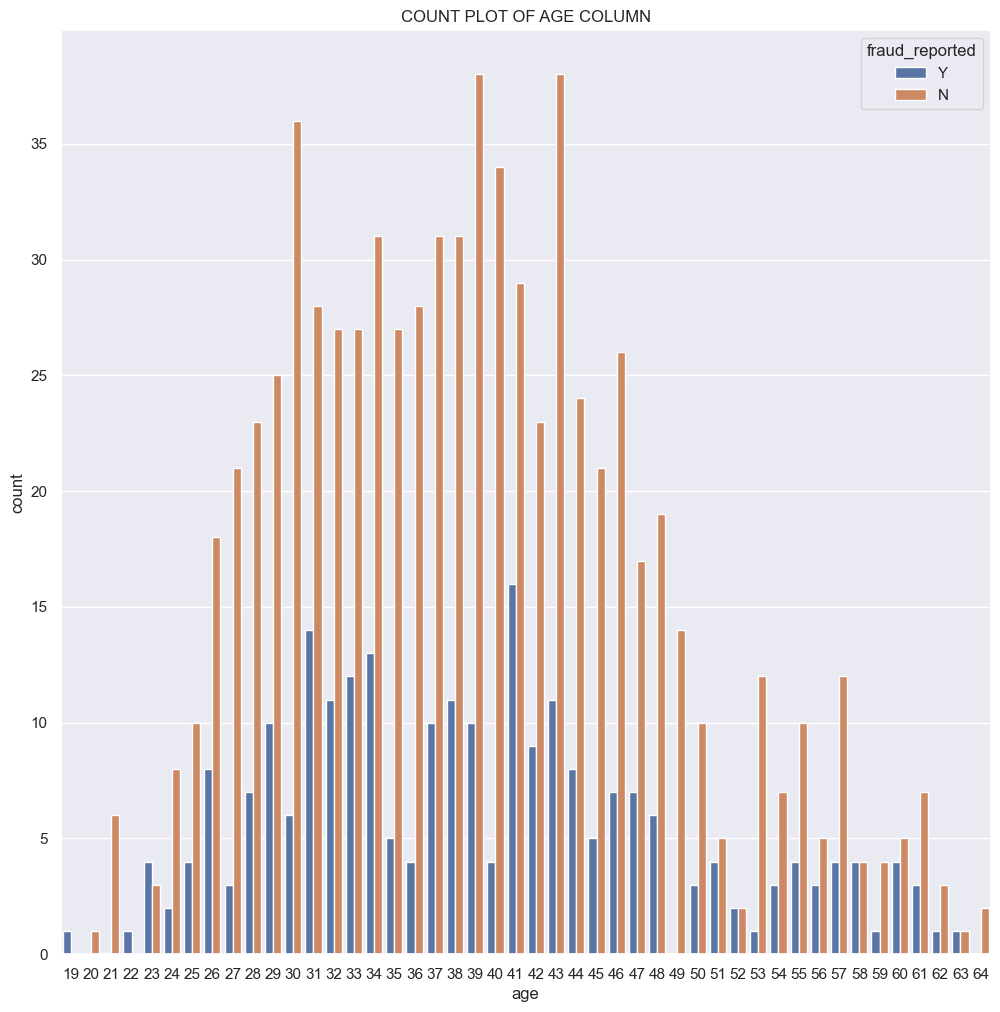

In [20]:
plt.figure(figsize=(12,12))
sns.set()
sns.countplot(x='age',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF AGE COLUMN')
plt.show()

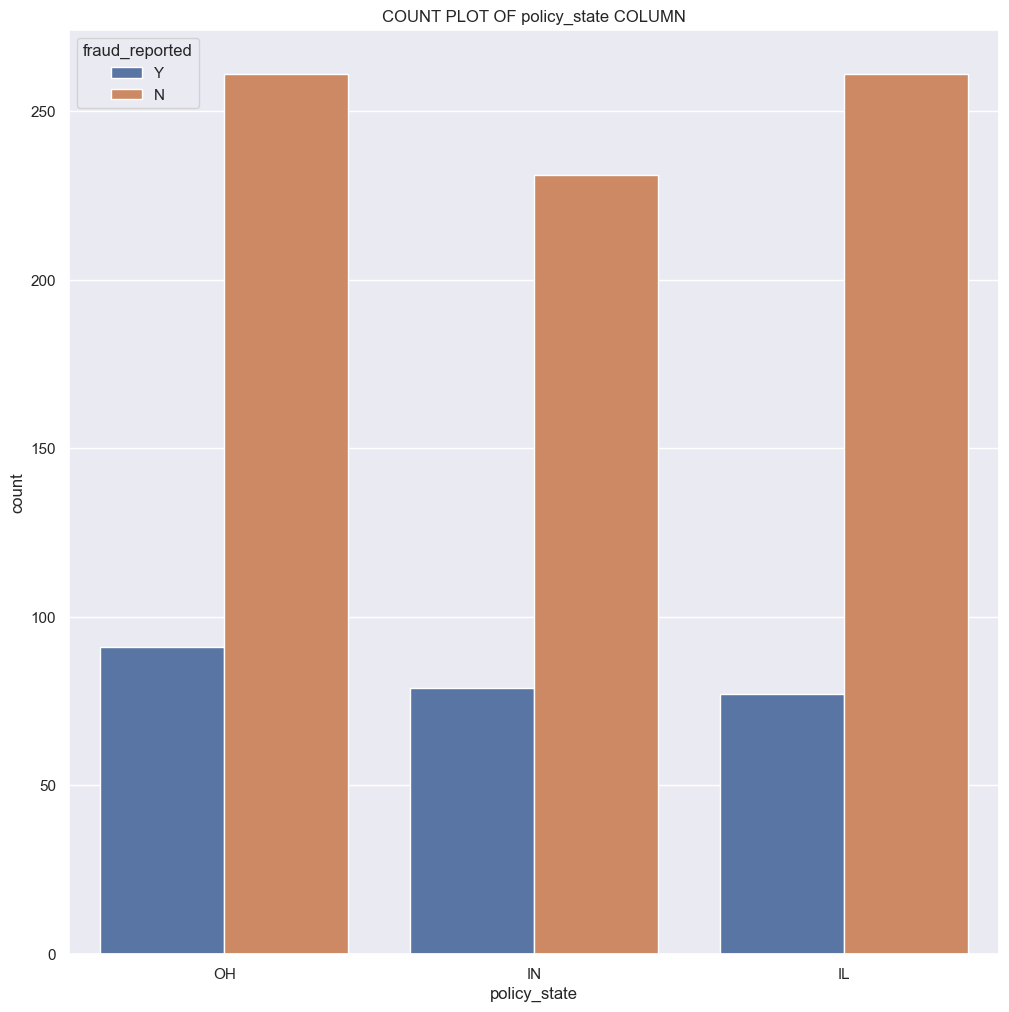

In [22]:
plt.figure(figsize=(12,12))
sns.countplot(x='policy_state',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF policy_state COLUMN')
plt.show()



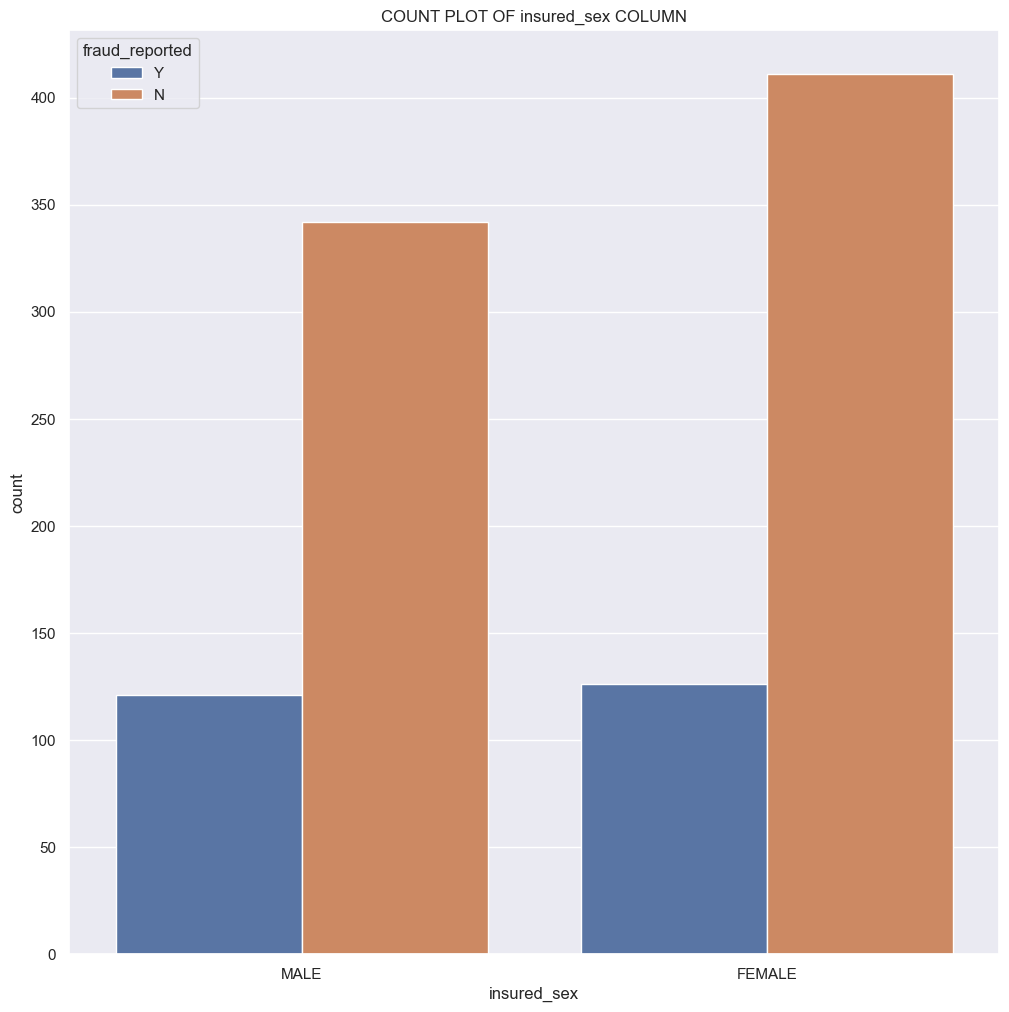

In [23]:

plt.figure(figsize=(12,12))
sns.countplot(x='insured_sex',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF insured_sex COLUMN')
plt.show()



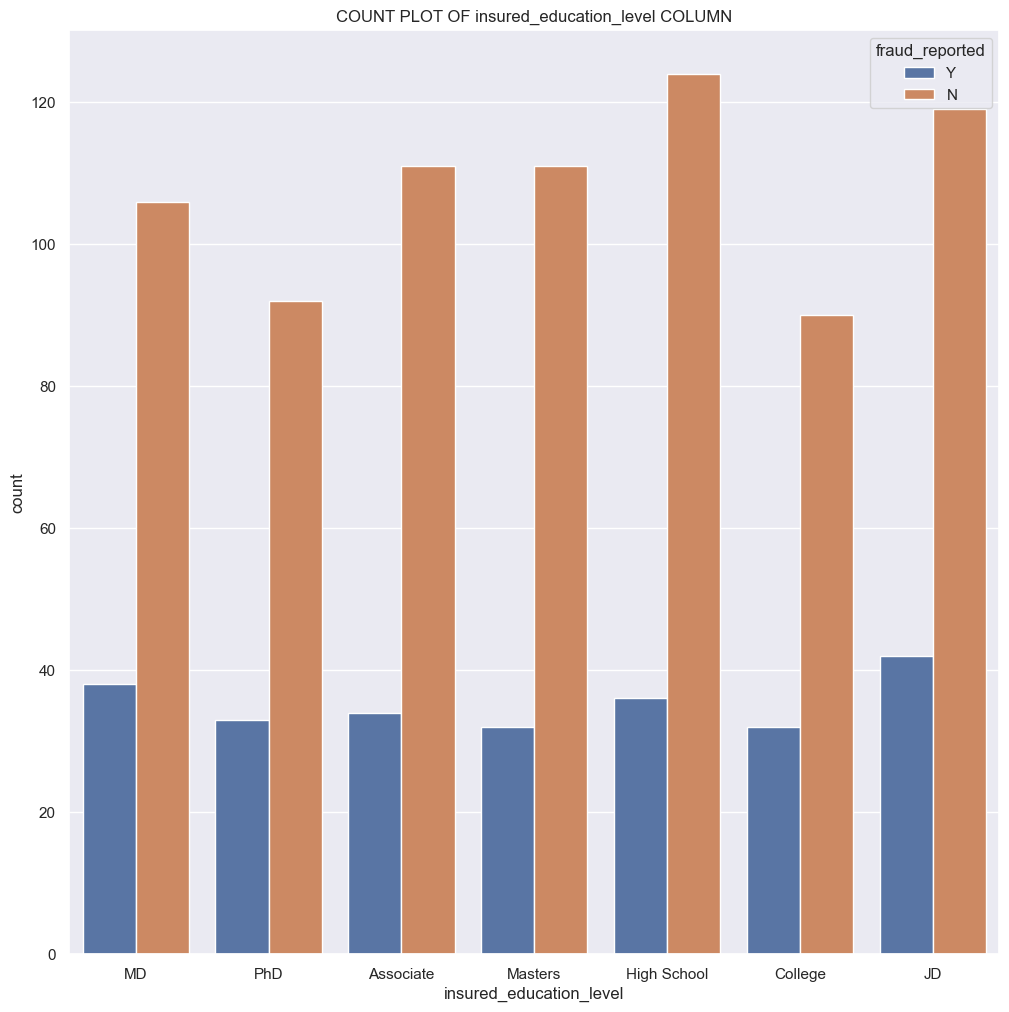

In [25]:

plt.figure(figsize=(12,12))
sns.countplot(x='insured_education_level',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF insured_education_level COLUMN')
plt.show()



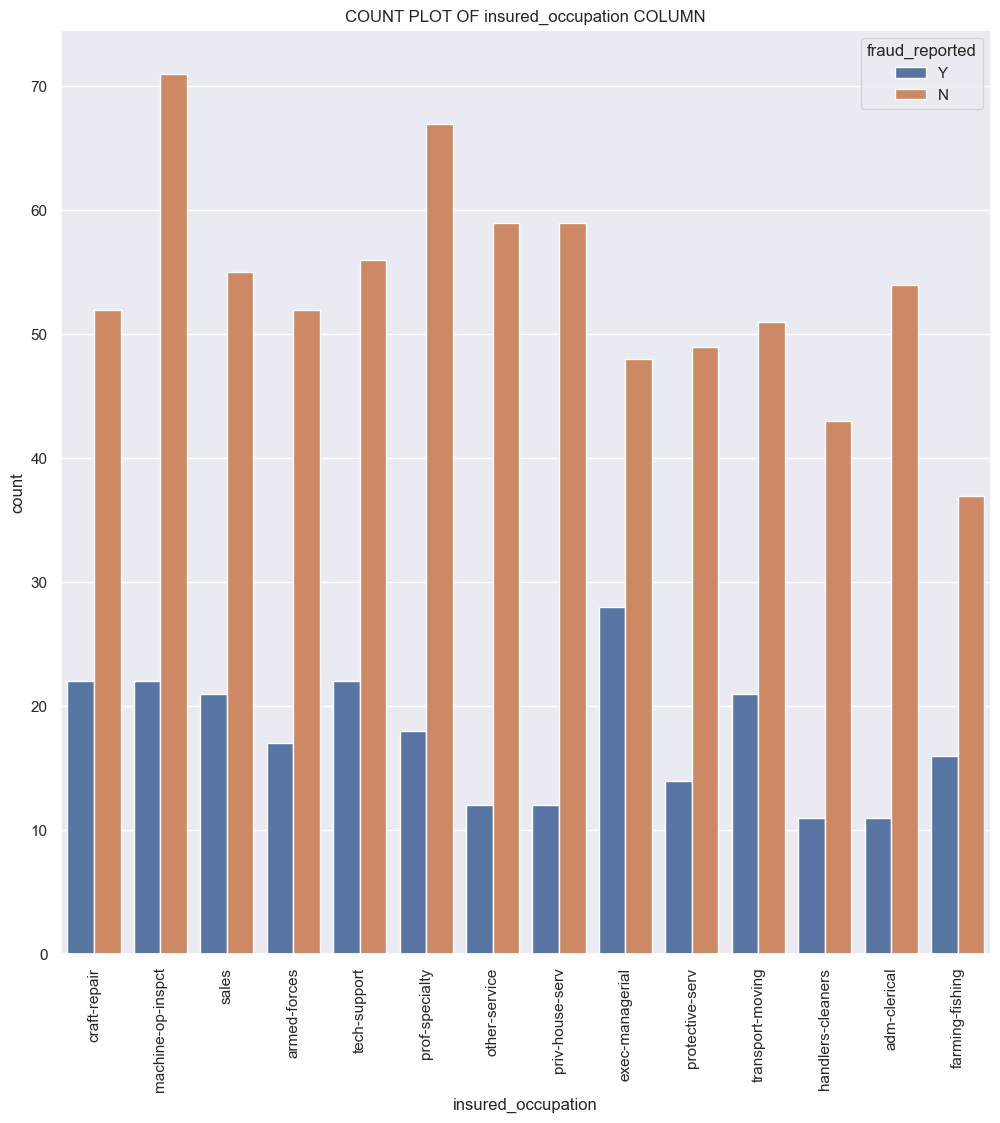

In [27]:

plt.figure(figsize=(12,12))
sns.countplot(x='insured_occupation',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF insured_occupation COLUMN')
plt.xticks(rotation=90)
plt.show()


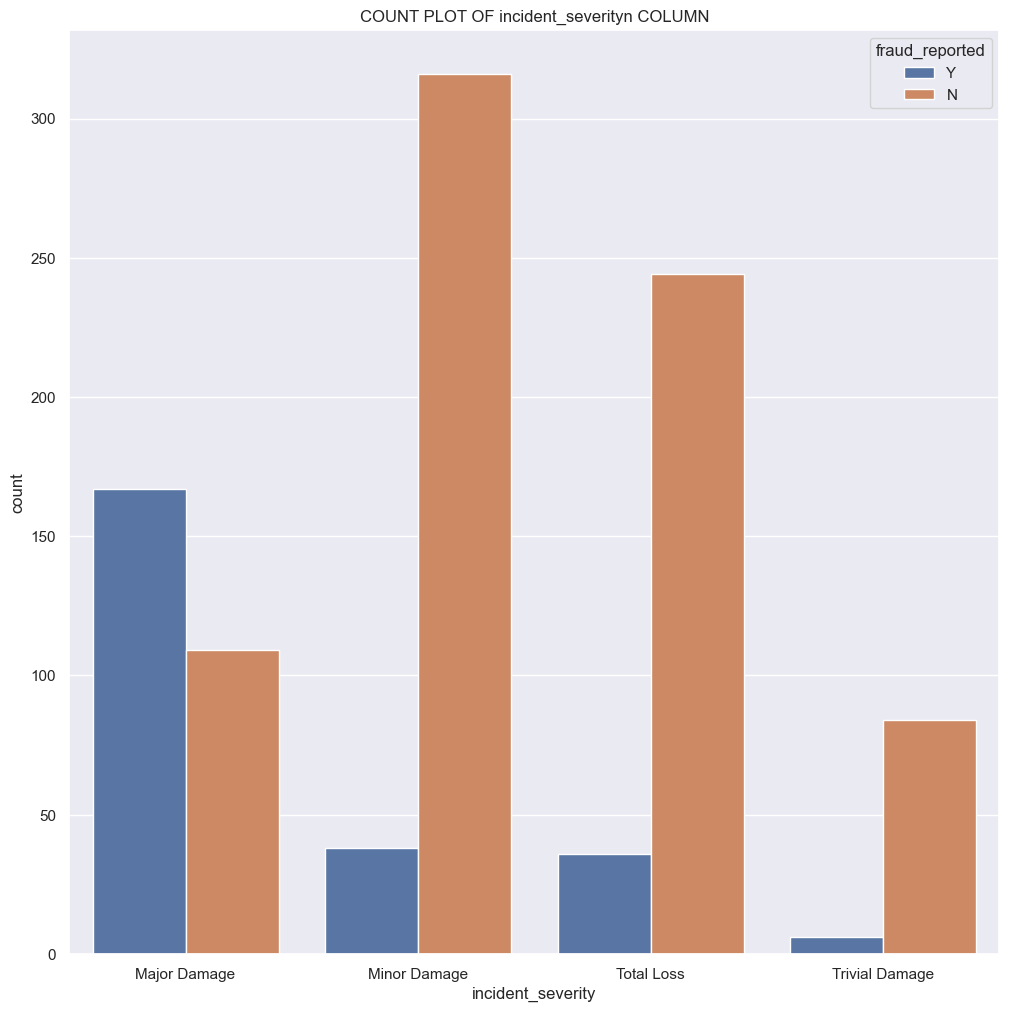

In [29]:

plt.figure(figsize=(12,12))
sns.countplot(x='incident_severity',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF incident_severityn COLUMN')
plt.show()


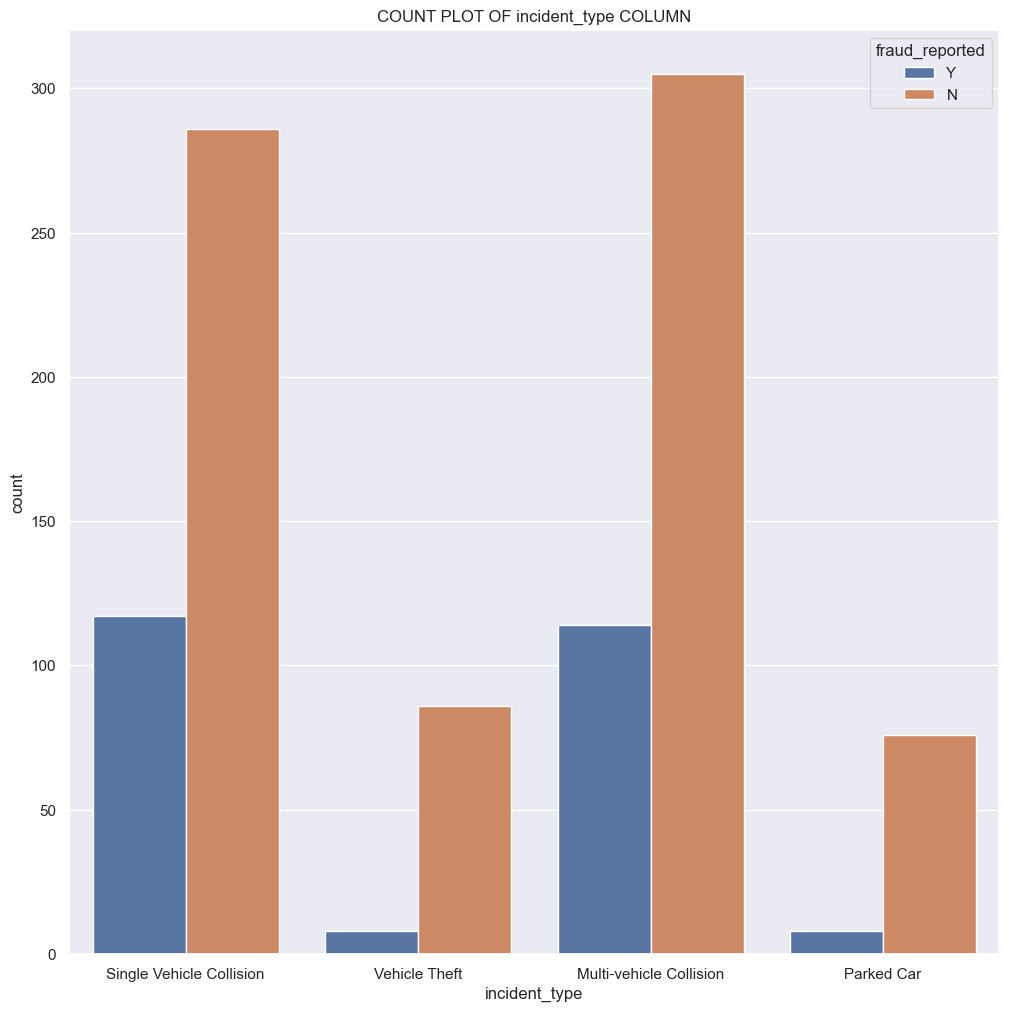

In [31]:

plt.figure(figsize=(12,12))
sns.countplot(x='incident_type',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF incident_type COLUMN')
plt.show()



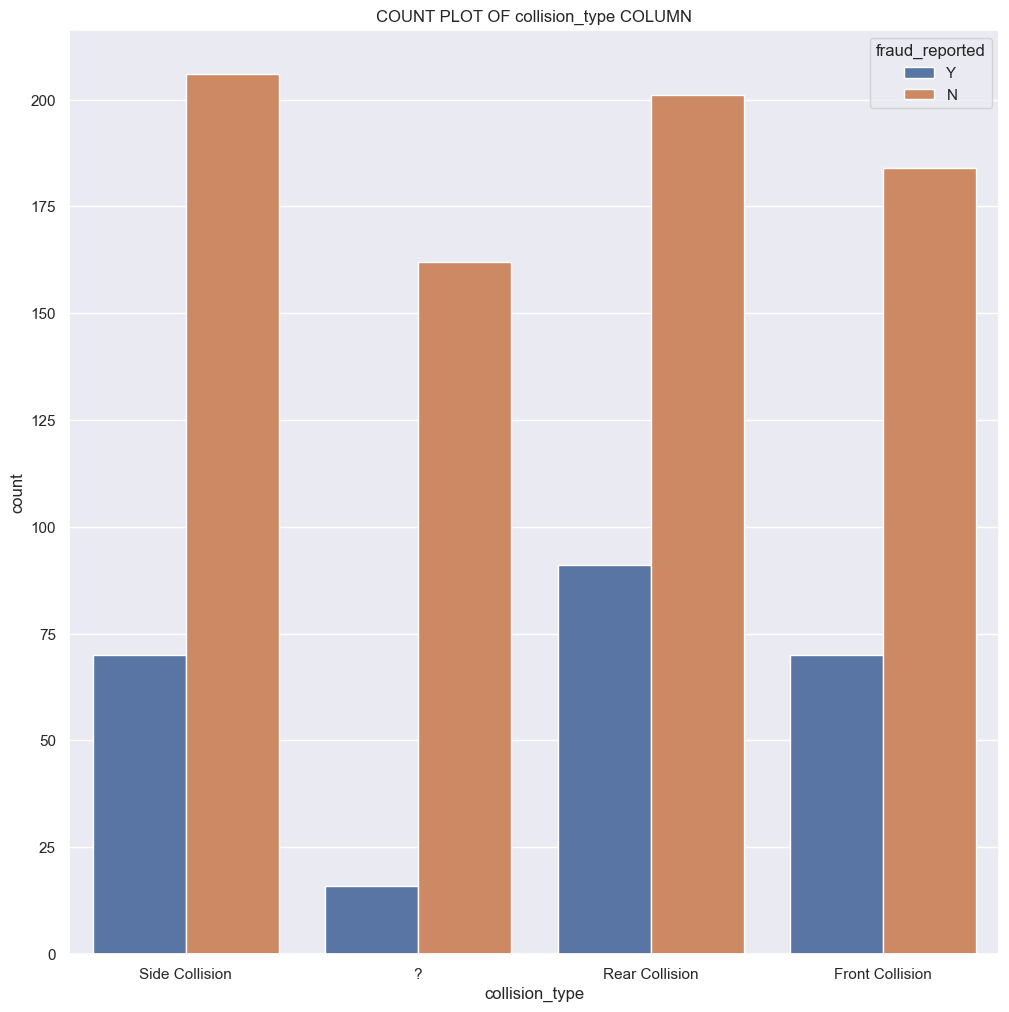

In [32]:
plt.figure(figsize=(12,12))
sns.countplot(x='collision_type',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF collision_type COLUMN')
plt.show()

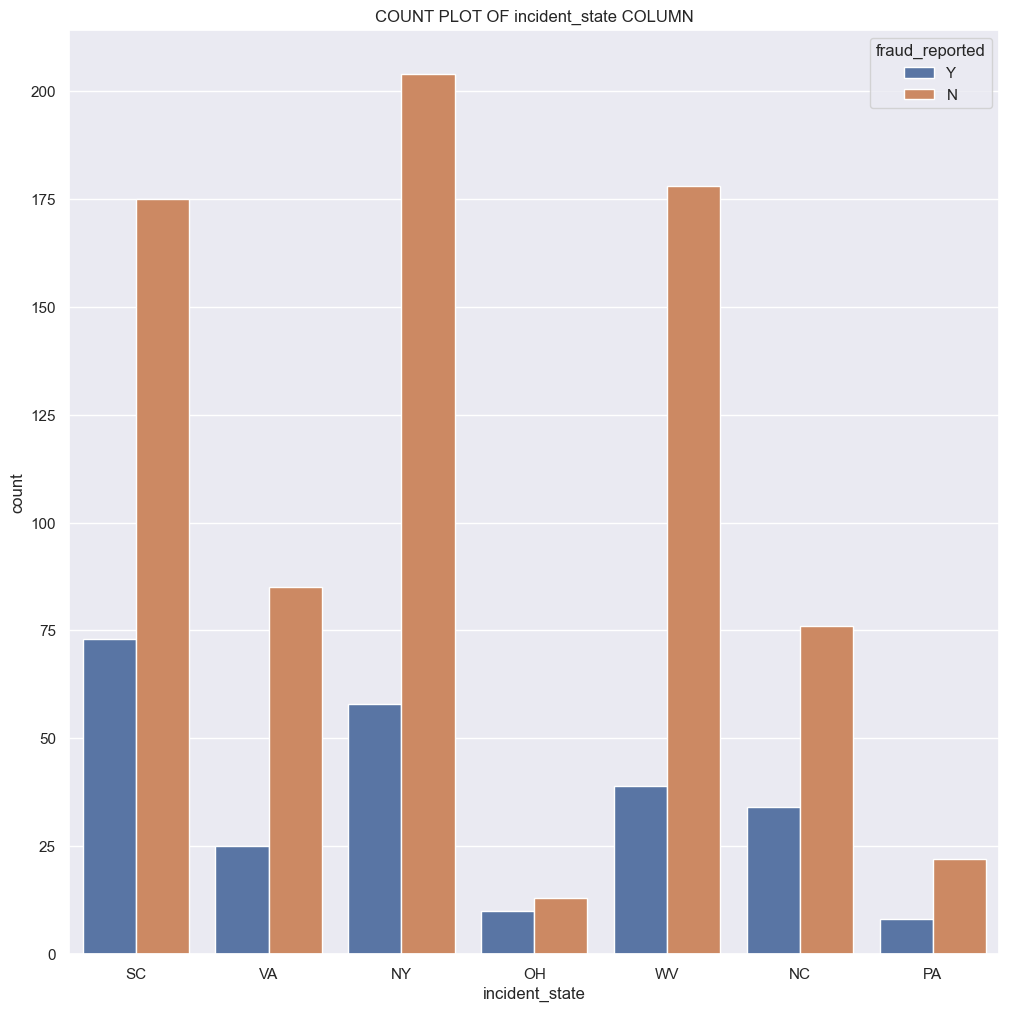

In [34]:
plt.figure(figsize=(12,12))
sns.countplot(x='incident_state',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF incident_state COLUMN')
plt.show()

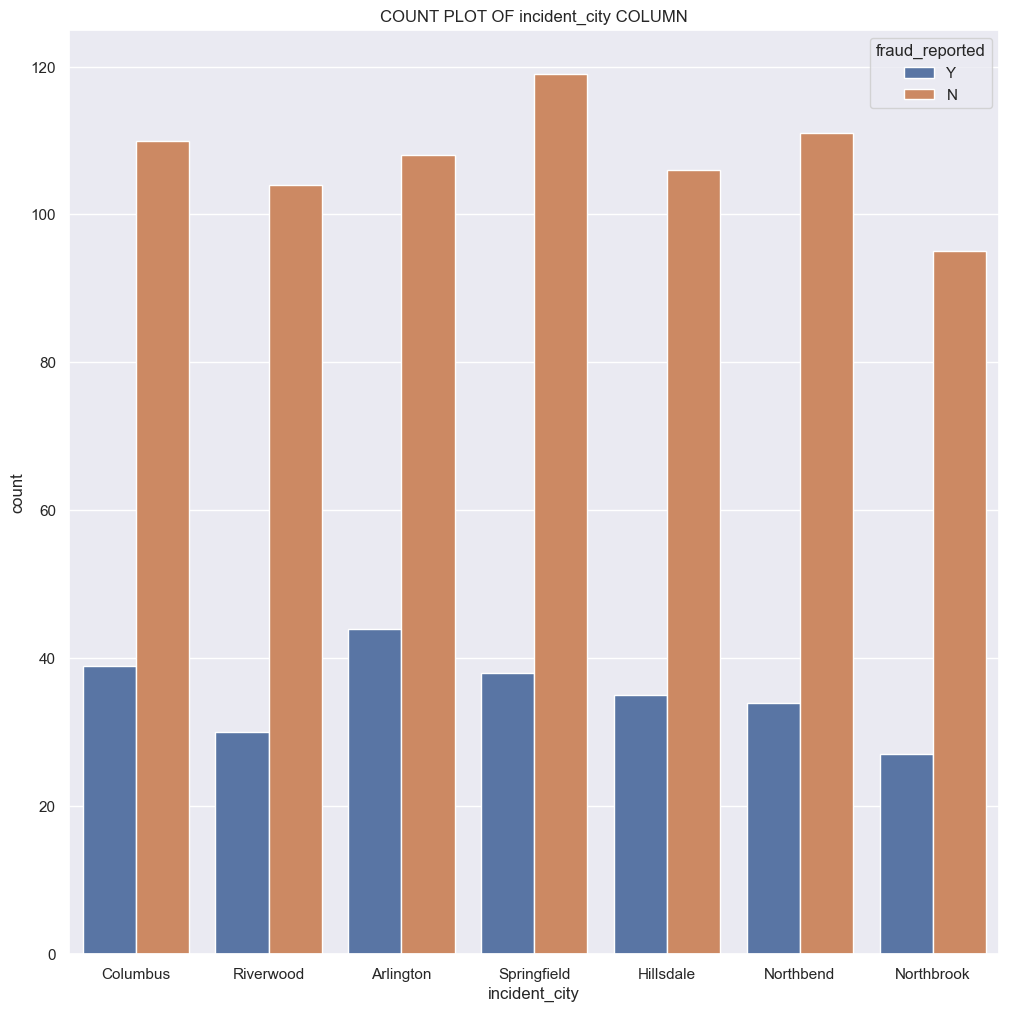

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(x='incident_city',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF incident_city COLUMN')
plt.show()

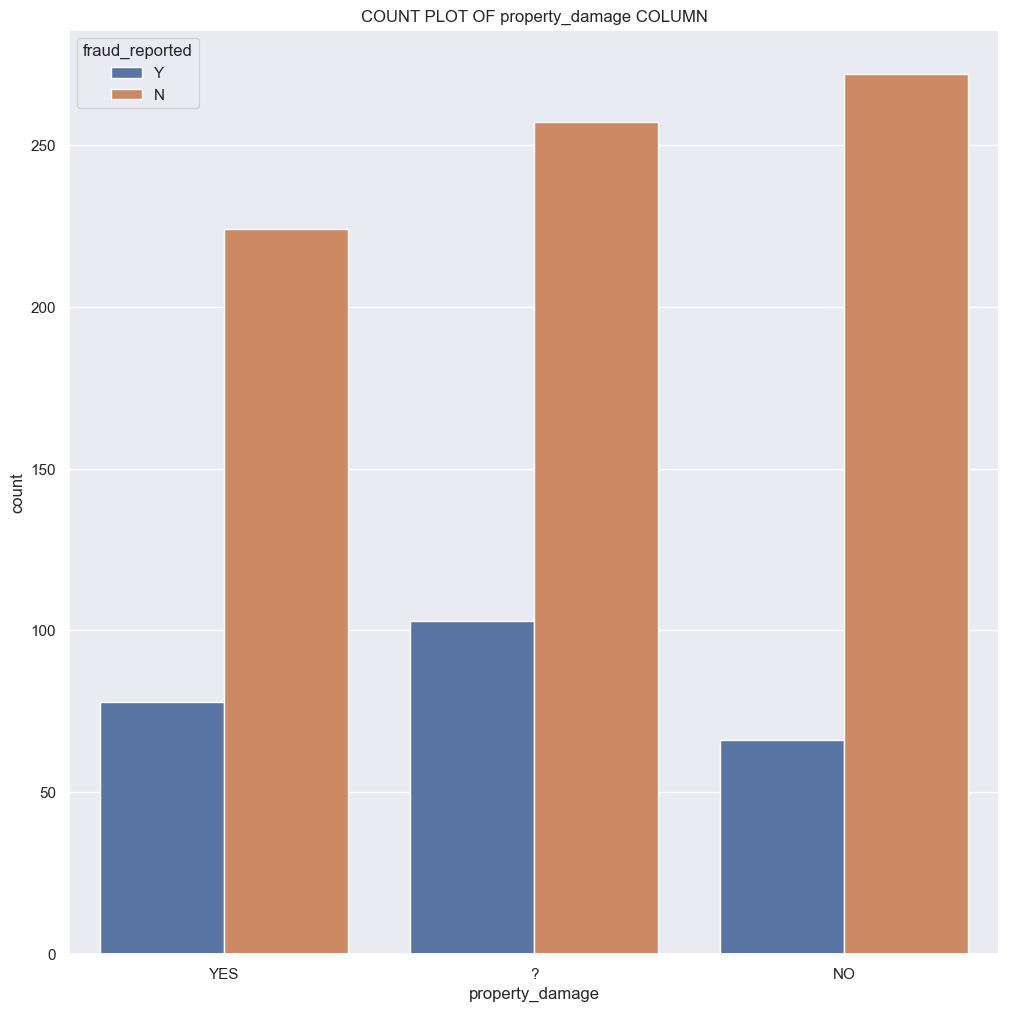

In [36]:
plt.figure(figsize=(12,12))
sns.countplot(x='property_damage',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF property_damage COLUMN')
plt.show()

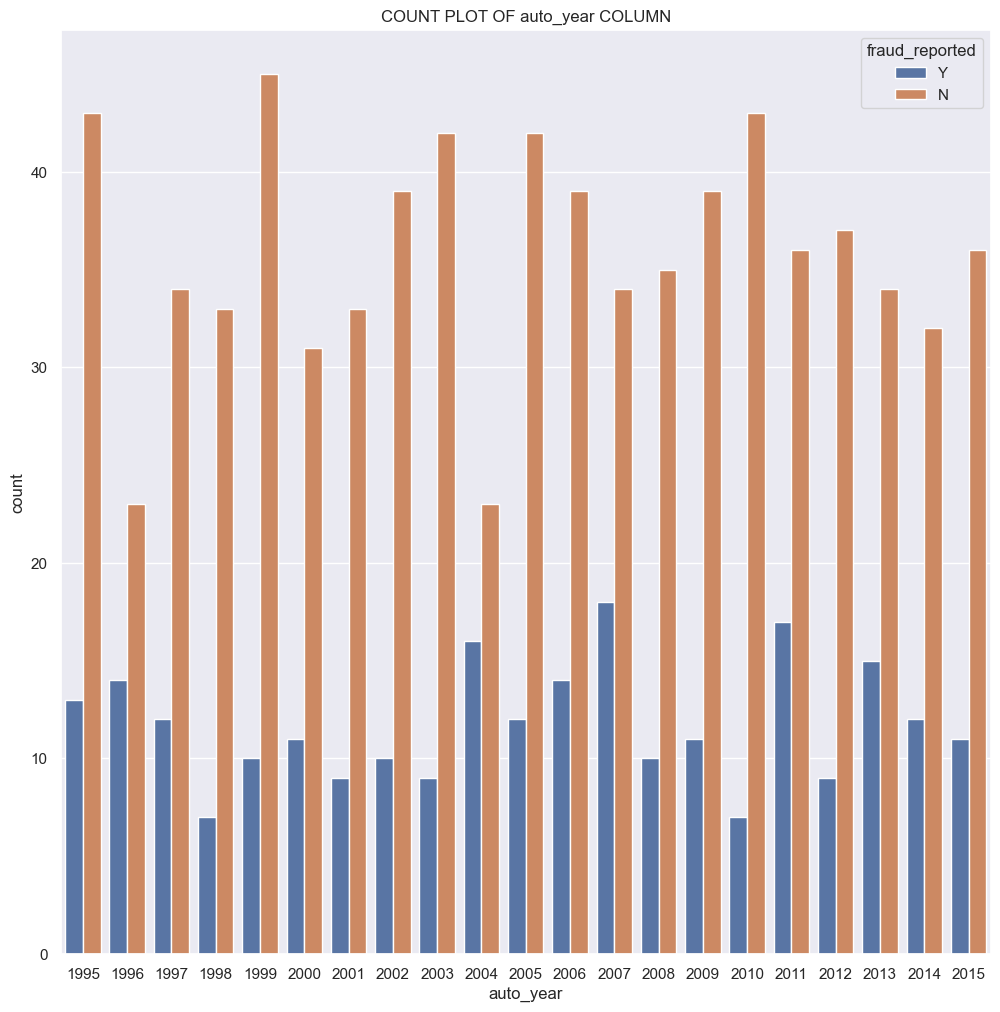

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(x='auto_year',data=df, hue='fraud_reported')
plt.title('COUNT PLOT OF auto_year COLUMN')
plt.show()

# Seperating numerical and categorical columns

In [40]:
numerical_col=[]
categorical_col=[]

for i in df.dtypes.index:
    if df[i].dtype=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

# Distplot

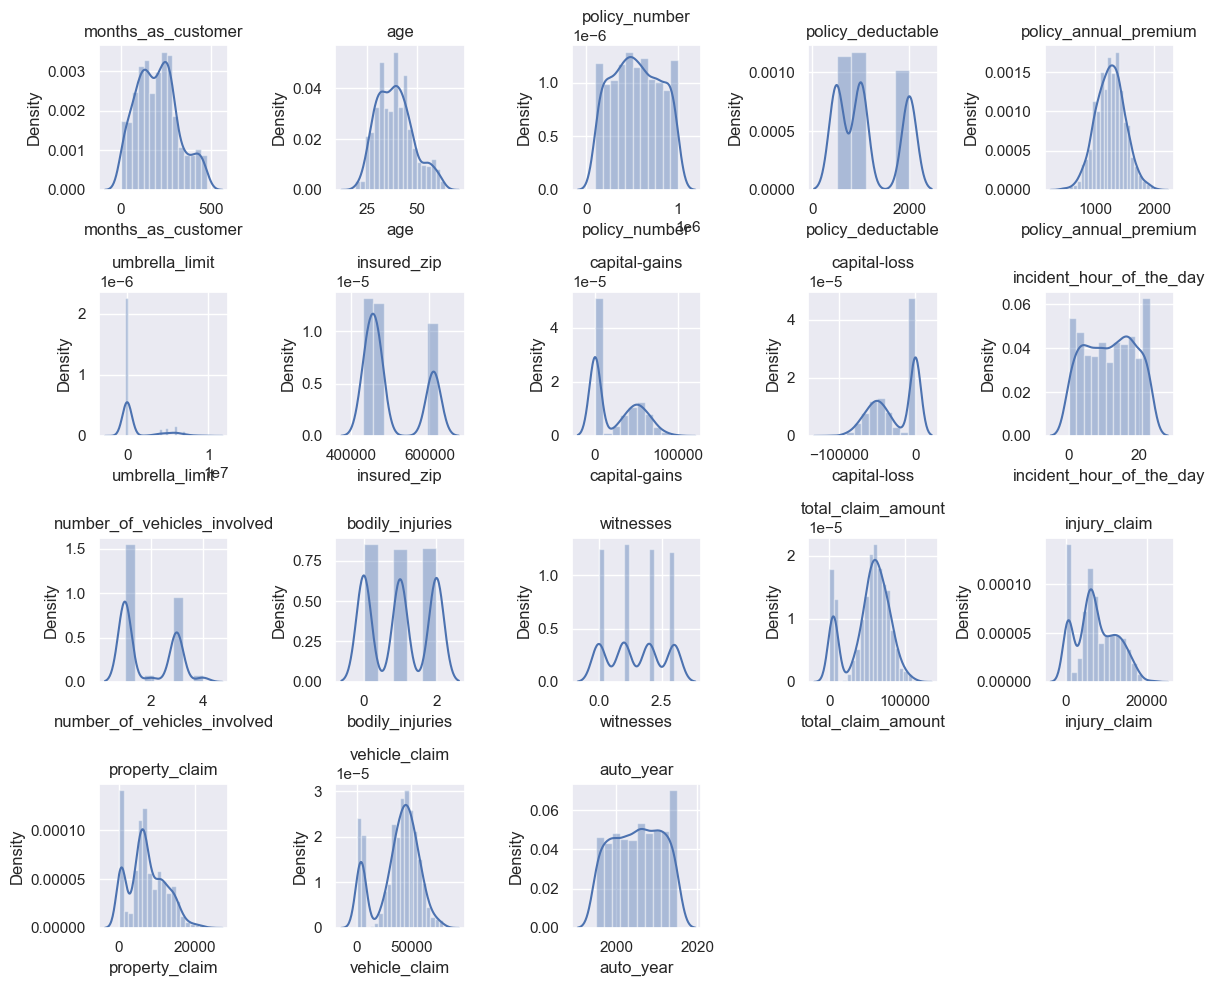

In [43]:
plt.figure(figsize=(12,12))
plotnumber=1

for i in numerical_col:
    if plotnumber<=20:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[i])
        plt.title(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

# boxplot

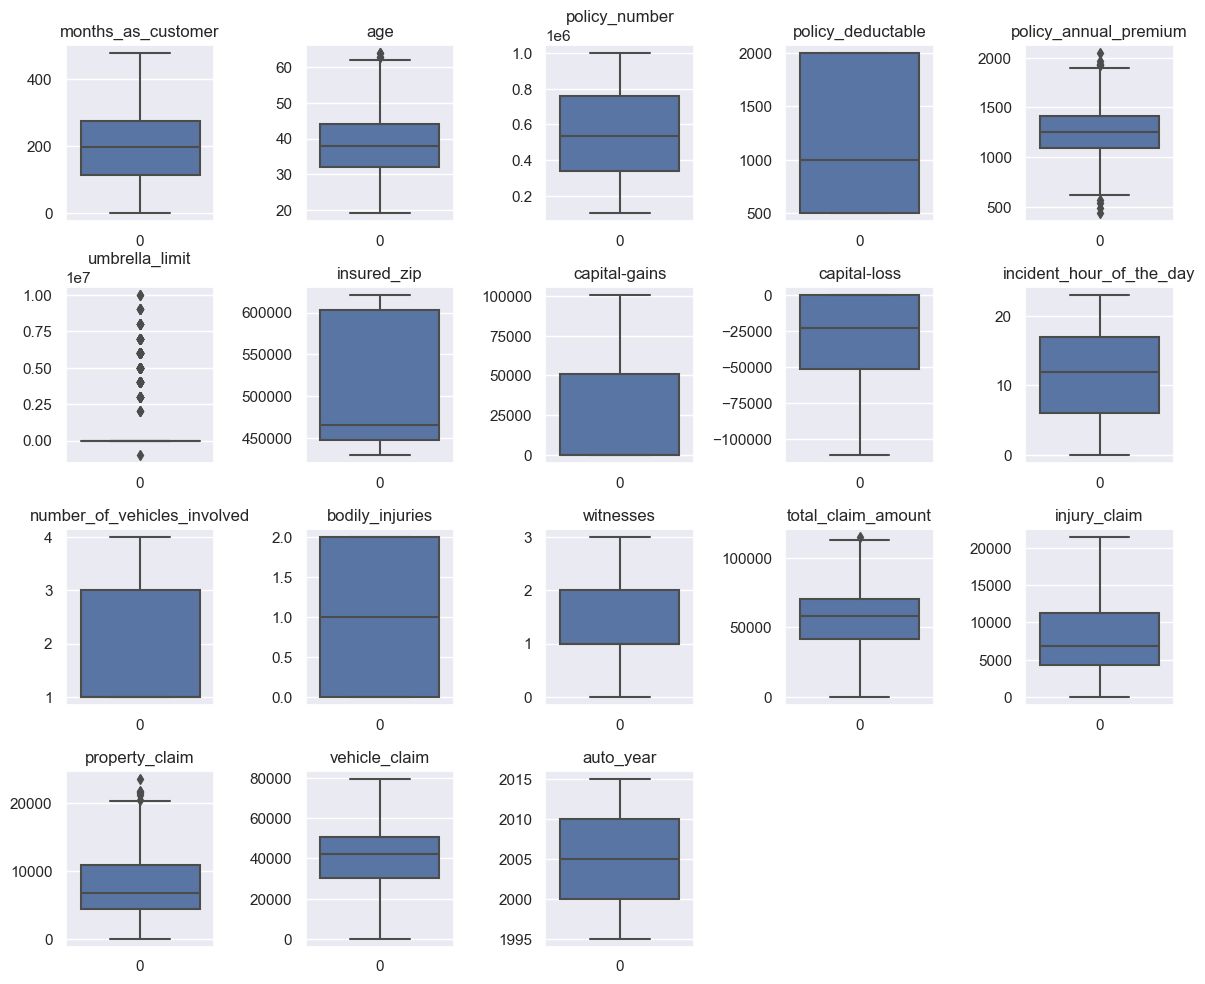

In [44]:
plt.figure(figsize=(12,12))
plotnumber=1

for i in numerical_col:
    if plotnumber<=20:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[i])
        plt.title(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Scatterplot

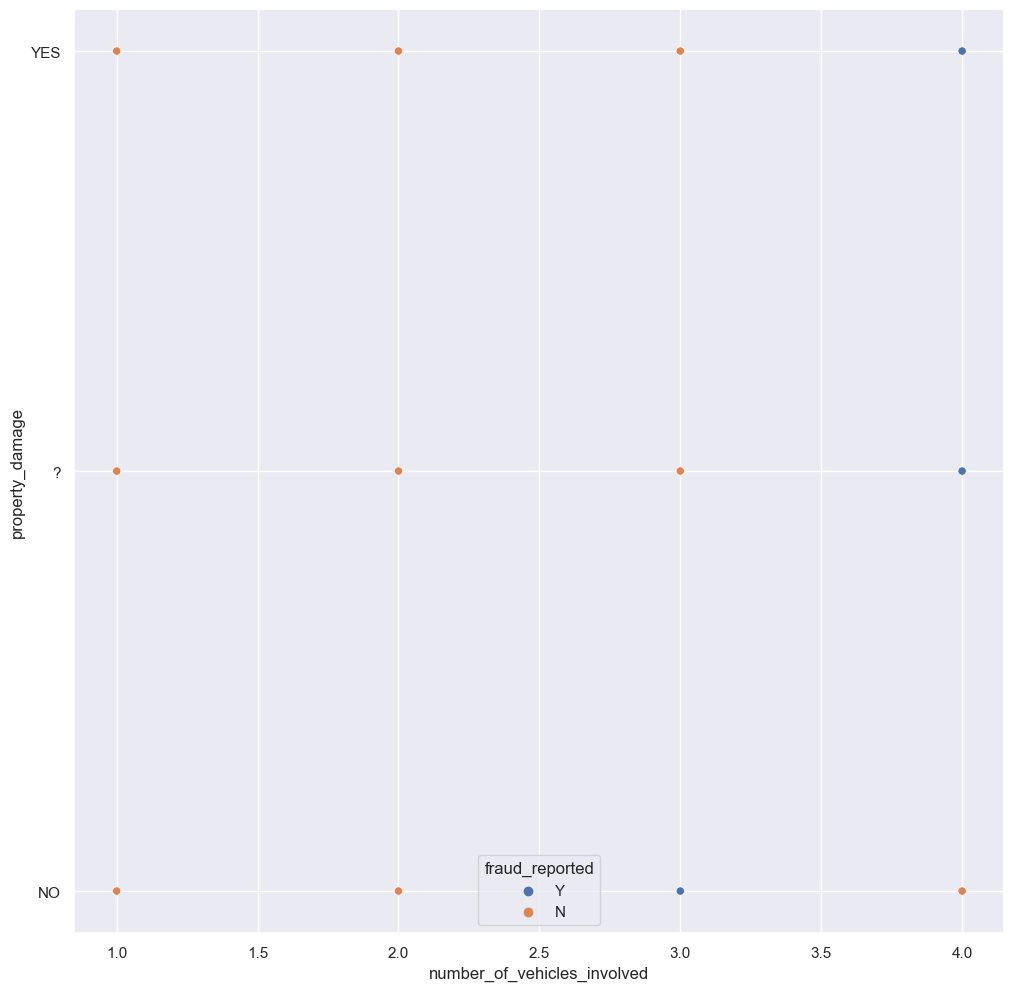

In [51]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='number_of_vehicles_involved',y='property_damage',hue='fraud_reported',data=df)

plt.show()

<Figure size 1200x1200 with 0 Axes>

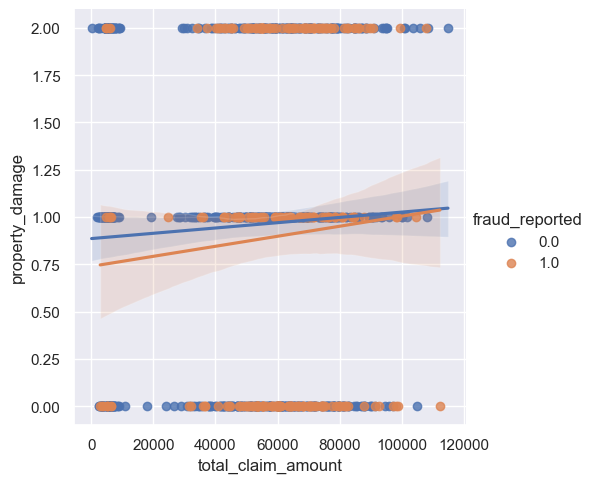

In [77]:
plt.figure(figsize=(12,12))
sns.lmplot(x='total_claim_amount',y='property_damage',hue='fraud_reported',data=df)

plt.show()

In [73]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Checking Corelation

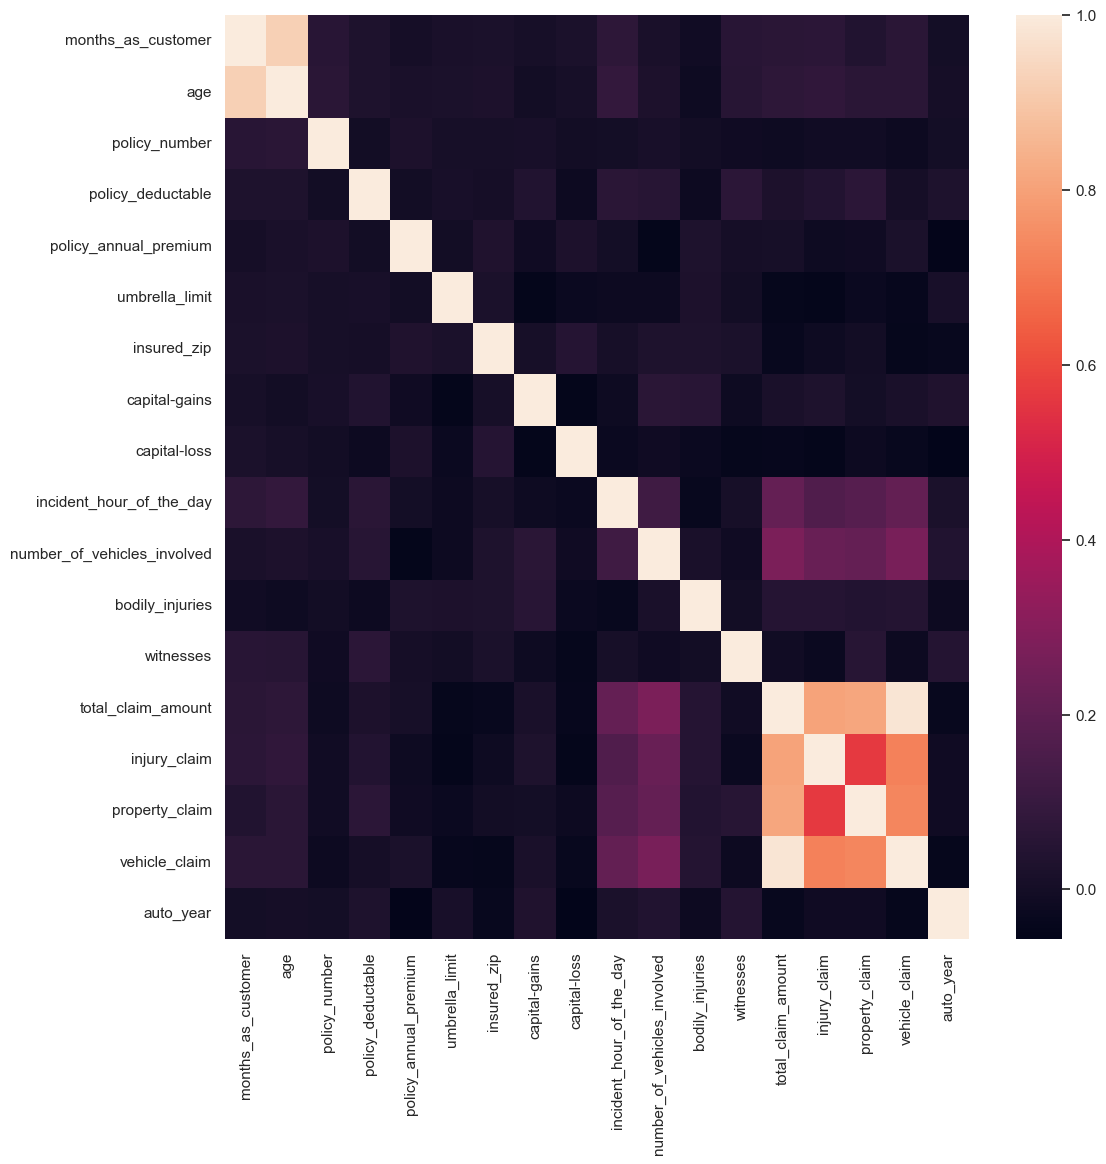

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

plt.show()

# Encoding the categorical column using ordinal encoding 

In [55]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [56]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0


# Seperating dependent and independent variables

In [78]:
x=df.drop(['fraud_reported','policy_number'],axis=1)
y=df.fraud_reported

# importing train test split

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier

In [81]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

svc=SVC()
svc.fit(x_train,y_train)

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

bgc=BaggingClassifier()
bgc.fit(x_train,y_train)

etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [82]:
y_pred1=lr.predict(x_test)
y_pred2=svc.predict(x_test)
y_pred3=rfc.predict(x_test)
y_pred4=gbc.predict(x_test)
y_pred5=abc.predict(x_test)
y_pred6=bgc.predict(x_test)
y_pred7=etc.predict(x_test)

In [83]:
models=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svc':y_pred2,'rfc':y_pred3,'gbc':y_pred4,'abc':y_pred5,'bgc':y_pred6,'etc':y_pred7})
models

,Actual,lr,svc,rfc,gbc,abc,bgc,etc
594,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
328,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
731,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
643,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Checking accuracy score

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
#checking  score of LogisticRegression
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)
score7=accuracy_score(y_test,y_pred7)

In [86]:
print(score1,score2,score3,score4,score5,score6,score7)

0.73 0.73 0.76 0.735 0.78 0.805 0.72


# gradient boosting classifier providing the high accuracy score

# saving the best model

In [87]:
import joblib

joblib.dump(gbc,'insurance_fruad_detection')

['insurance_fruad_detection']

# Predicting on the new data

In [115]:
new_data=pd.DataFrame({'months_as_customer':328,
 'age':48,
 'policy_bind_date':532.0,
 'policy_state':2.0,
 'policy_csl':1.0,
 'policy_deductable':100,
 'policy_annual_premium':1406.91,
 'umbrella_limit':0,
 'insured_zip':466132,
 'insured_sex':1.0,
 'insured_education_level':4.0,
 'insured_occupation':2.0,
 'insured_hobbies':17.0,
 'insured_relationship':0.0,
 'capital-gains':53300,
 'capital-loss':0,
 'incident_date':49.0,
 'incident_type':2.0,
 'collision_type':3.0,
 'incident_severity':0.0,
 'authorities_contacted':4.0,
 'incident_state':4.0,
 'incident_city':1.0,
 'incident_location':996.0,
 'incident_hour_of_the_day':5,
 'number_of_vehicles_involved':1,
 'property_damage':2.0,
 'bodily_injuries':1,
 'witnesses':2,
 'police_report_available':2.0,
 'total_claim_amount':71610,
 'injury_claim':13020,
 'property_claim':52080,
 'vehicle_claim':10.0,
 'auto_make':1.0,
 'auto_model':2004,
 'auto_year':1.0},index=[0])

In [116]:
new_data

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,532.0,2.0,1.0,100,1406.91,0,466132,1.0,...,1,2,2.0,71610,13020,52080,10.0,1.0,2004,1.0


In [118]:
model=joblib.load('insurance_fruad_detection')

In [130]:
result=model.predict(new_data)

In [133]:
if result==0:
    print('Fruad')
else:
    print('Not Fruad')

Not Fruad
